In [1]:
import pandas as pd
import polars as pl

tweets = pl.read_parquet('./master_fnn.parquet')
users = pl.read_csv('../database/master_users.csv')

In [2]:
tweets.columns

['lang',
 'id',
 'entities',
 'public_metrics',
 'context_annotations',
 'possibly_sensitive',
 'created_at',
 'author_id',
 'text',
 'conversation_id',
 'edit_history_tweet_ids',
 'reply_settings',
 'in_reply_to_user_id',
 'referenced_tweets',
 'geo',
 'withheld',
 'label',
 'processed_text']

In [3]:
users_metrics = users.select([
    pl.col('id'),
    pl.col('public_metrics.followers_count').alias('followers_count'),
    pl.col('public_metrics.following_count').alias('following_count'),
    pl.col('public_metrics.tweet_count').alias('tweet_count'),
    pl.col('public_metrics.listed_count').alias('listed_count'),
])

In [16]:
tweets_metrics = tweets.select([
    pl.col('label'),
    pl.col('created_at'),
    pl.col('public_metrics').struct.field('impression_count'),
    pl.col('public_metrics').struct.field('like_count'),
    pl.col('public_metrics').struct.field('quote_count'),
    pl.col('public_metrics').struct.field('reply_count'),
    pl.col('public_metrics').struct.field('retweet_count'),
])

tweets_metrics_true = tweets.select([
    pl.col('label'),
    pl.col('created_at'),
    pl.col('public_metrics').struct.field('impression_count'),
    pl.col('public_metrics').struct.field('like_count'),
    pl.col('public_metrics').struct.field('quote_count'),
    pl.col('public_metrics').struct.field('reply_count'),
    pl.col('public_metrics').struct.field('retweet_count'),
]).filter(pl.col('label') == 'true')

tweets_metrics_false = tweets.select([
    pl.col('label'),
    pl.col('created_at'),
    pl.col('public_metrics').struct.field('impression_count'),
    pl.col('public_metrics').struct.field('like_count'),
    pl.col('public_metrics').struct.field('quote_count'),
    pl.col('public_metrics').struct.field('reply_count'),
    pl.col('public_metrics').struct.field('retweet_count'),
]).filter(pl.col('label') == 'false')

In [5]:
tweets_metrics.describe()

describe,label,created_at,impression_count,like_count,quote_count,reply_count,retweet_count
str,str,str,f64,f64,f64,f64,f64
"""count""","""1434575""","""1434575""",1.434575e6,1.434575e6,1.434575e6,1.434575e6,1.434575e6
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,0.0,4.888488,0.259577,0.481569,1.558221
"""std""",null,null,0.0,217.897206,15.402432,27.280255,77.450645
"""min""","""false""","""2007-06-03 19:…",0.0,0.0,0.0,0.0,0.0
"""max""","""true""","""2018-12-16 11:…",0.0,121340.0,8703.0,19099.0,48469.0
"""median""",null,null,0.0,0.0,0.0,0.0,0.0


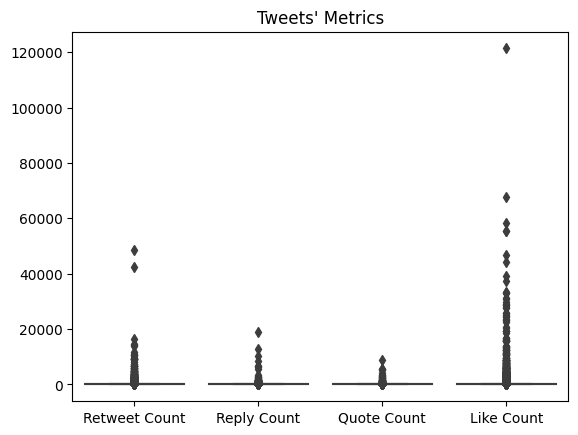

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_metrics[["retweet_count", "reply_count", "quote_count", "like_count"]])

ax.set_xticklabels(["Retweet Count", "Reply Count", "Quote Count", "Like Count"])
ax.set_title("Tweets' Metrics")

plt.savefig("./output/metrics_tweets_all.png", dpi=300)
plt.show()

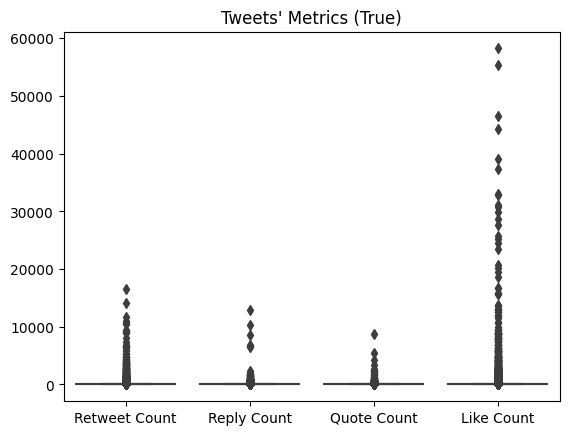

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_metrics_true[["retweet_count", "reply_count", "quote_count", "like_count"]])

ax.set_xticklabels(["Retweet Count", "Reply Count", "Quote Count", "Like Count"])
ax.set_title("Tweets' Metrics (True)")

plt.savefig("./output/metrics_tweets_true.png", dpi=300)
plt.show()

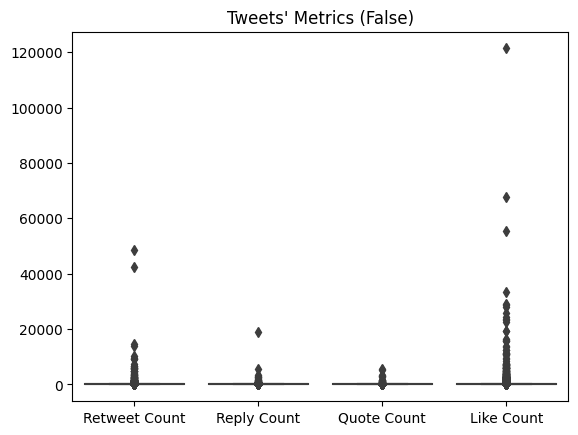

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_metrics_false[["retweet_count", "reply_count", "quote_count", "like_count"]])

ax.set_xticklabels(["Retweet Count", "Reply Count", "Quote Count", "Like Count"])
ax.set_title("Tweets' Metrics (False)")

plt.savefig("./output/metrics_tweets_false.png", dpi=300)
plt.show()

In [21]:
tweets_user_metrics = tweets.select([
    pl.col('label'),
    pl.col('author_id'),
]).join(users_metrics, left_on='author_id', right_on='id')

tweets_user_metrics_true = tweets_user_metrics.filter(pl.col('label') == 'true')
tweets_user_metrics_false = tweets_user_metrics.filter(pl.col('label') == 'false')

In [8]:
tweets_user_metrics.describe()

describe,label,author_id,followers_count,following_count,tweet_count,listed_count
str,str,f64,f64,f64,f64,f64
"""count""","""2564711""",2.564711e6,2.564711e6,2.564711e6,2.564711e6,2.564711e6
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,1.8149e17,167403.934538,3682.773886,196833.196264,691.743246
"""std""",null,3.4737e17,1.7295e6,16959.672314,339158.801524,5580.329582
"""min""","""false""",41.0,0.0,0.0,0.0,0.0
"""max""","""true""",1.0741e18,1.33306723e8,1.102742e6,2.2519593e7,218414.0
"""median""",null,1.1298e9,797.0,716.0,63843.0,22.0


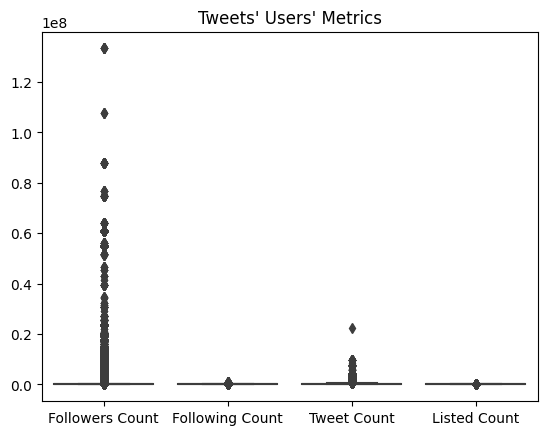

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_user_metrics[["followers_count", "following_count", "tweet_count", "listed_count"]])

ax.set_xticklabels(["Followers Count", "Following Count", "Tweet Count", "Listed Count"])
ax.set_title("Tweets' Users' Metrics")

plt.savefig("./output/metrics_tweets_all_user.png", dpi=300)
plt.show()

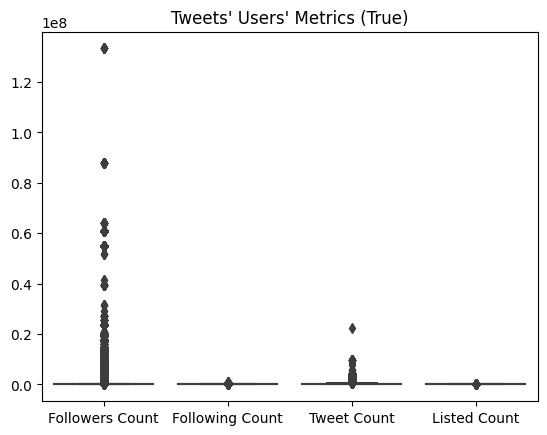

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_user_metrics_true[["followers_count", "following_count", "tweet_count", "listed_count"]])

ax.set_xticklabels(["Followers Count", "Following Count", "Tweet Count", "Listed Count"])
ax.set_title("Tweets' Users' Metrics (True)")

plt.savefig("./output/metrics_tweets_true_user.png", dpi=300)
plt.show()

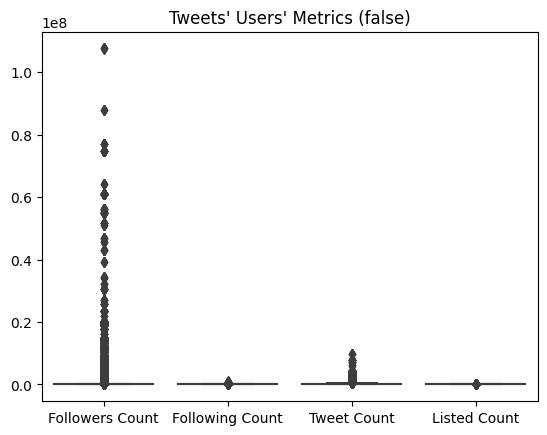

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=tweets_user_metrics_false[["followers_count", "following_count", "tweet_count", "listed_count"]])

ax.set_xticklabels(["Followers Count", "Following Count", "Tweet Count", "Listed Count"])
ax.set_title("Tweets' Users' Metrics (false)")

plt.savefig("./output/metrics_tweets_false_user.png", dpi=300)
plt.show()